##  데이터 읽어오기 -> 데이터 전처리를 통한 상관분석 및 히트맵

In [1]:
## 경고 메세지 표시 안함
import warnings
warnings.filterwarnings(action='ignore')

###  mpg 데이터셋을 이용

###### 1. mpg 데이터셋을 판다스로 읽어온다

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False  # '- 표시

In [3]:
mpg_data = sns.load_dataset("mpg")
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


###### 2. 데이터의 기본 정보 확인하기

In [4]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


###### 3. 결측치의 개수 확인

In [5]:
mpg_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

###### 4. 결측치 처리 (평균값으로)

In [7]:
mpg_data['horsepower'].fillna(mpg_data['horsepower'].mean(), inplace=True)
mpg_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

###### 5. 범주형데이터(origin)를 숫자로 변환 ('usa':0, 'europe':1,  'japan': 2)

#######  새로운 항목('origin_encoded')에 숫자로 저장

In [8]:
mpg_data['origin_encoded']=mpg_data['origin'].map({'usa': 0, 'europe': 1, 'japan': 2})
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin_encoded
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,0
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,1
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,0
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,0


###### 6.  ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_encoded'] 항목만 선택하여 변수(subset)에 저장

In [9]:
subset = mpg_data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_encoded']]
subset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_encoded
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0
394,44.0,4,97.0,52.0,2130,24.6,82,1
395,32.0,4,135.0,84.0,2295,11.6,82,0
396,28.0,4,120.0,79.0,2625,18.6,82,0


###### 7. 데이터 표준화

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# StandardScaler를 사용하여 데이터 표준화
scaler = StandardScaler()
subset_st = scaler.fit_transform(subset.drop(['mpg'], axis=1))

subset_st

array([[ 1.49819126,  1.0906037 ,  0.66919608, ..., -1.29549834,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.5035143 ,  1.58659918, ..., -1.47703779,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.19623199,  1.19342642, ..., -1.65857724,
        -1.62742629, -0.71514478],
       ...,
       [-0.85632057, -0.56103873, -0.53653371, ..., -1.4407299 ,
         1.62198339, -0.71514478],
       [-0.85632057, -0.70507731, -0.66759129, ...,  1.10082237,
         1.62198339, -0.71514478],
       [-0.85632057, -0.71467988, -0.58895674, ...,  1.39128549,
         1.62198339, -0.71514478]])

In [12]:
# 표준화된 데이터를 판다스 데이터프레임으로 변환
subset_st_df = pd.DataFrame(subset_st, columns=subset.columns[1:])
subset_st_df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_encoded
0,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,-0.715145
1,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,-0.715145
2,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,-0.715145
3,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,-0.715145
4,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.484111,-0.213324,0.011586,1.621983,-0.715145
394,-0.856321,-0.925936,-1.375302,-0.993671,3.279296,1.621983,0.533222
395,-0.856321,-0.561039,-0.536534,-0.798585,-1.440730,1.621983,-0.715145
396,-0.856321,-0.705077,-0.667591,-0.408411,1.100822,1.621983,-0.715145


###### 8. 상관분석

In [13]:
corr_matrix = subset_st_df.corr()
corr_matrix

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_encoded
cylinders,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model_year,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin_encoded,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


###### 9. 히트맵 그리기

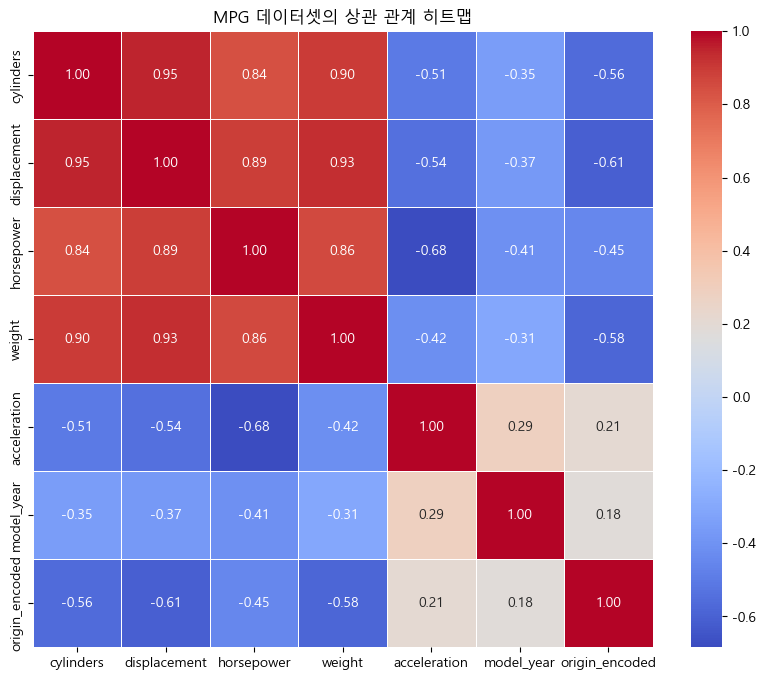

In [15]:
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False  # '- 표시

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('MPG 데이터셋의 상관 관계 히트맵')
plt.show()

### tips 데이터 셋 이용

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False  # '- 표시

###### 1. 데이터 읽어오기

In [17]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


###### 2. 기본정보 확인

In [18]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


###### 3. catplot

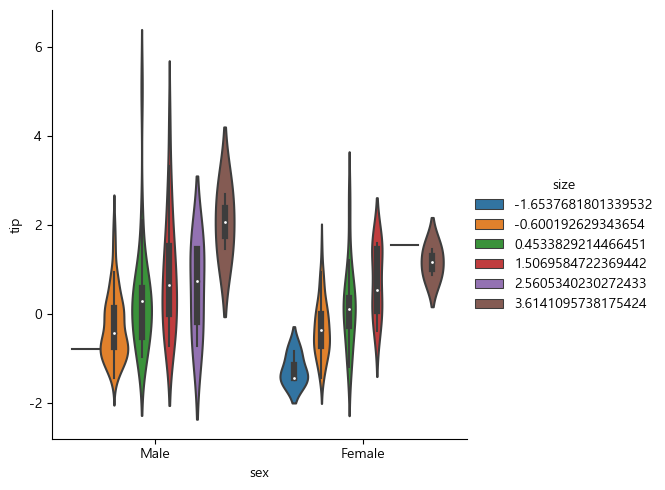

In [23]:
sns.catplot(x = 'sex', y = 'tip', hue = 'size', data = tips, kind = 'violin')

## kind : violin, strip, swarm, box, boxen, point, bar, line  등

###### 4. 수치형 변수들만 저장 -> 표준화

In [22]:
num = ['total_bill', 'tip', 'size']

scaler = StandardScaler()
tips[num] = scaler.fit_transform(tips[num])

tips

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,Female,No,Sun,Dinner,-0.600193
1,-1.063235,-0.969205,Male,No,Sun,Dinner,0.453383
2,0.137780,0.363356,Male,No,Sun,Dinner,0.453383
3,0.438315,0.225754,Male,No,Sun,Dinner,-0.600193
4,0.540745,0.443020,Female,No,Sun,Dinner,1.506958
...,...,...,...,...,...,...,...
239,1.040511,2.115963,Male,No,Sat,Dinner,0.453383
240,0.832275,-0.722971,Female,Yes,Sat,Dinner,-0.600193
241,0.324630,-0.722971,Male,Yes,Sat,Dinner,-0.600193
242,-0.221287,-0.904026,Male,No,Sat,Dinner,-0.600193


###### 5. 범주형 데이터들을 수치형으로 변환 (sex, smoker, day, time)

In [24]:
col = ['sex', 'smoker', 'day', 'time']

for r in col:
    tips[r + '_encoded'] = pd.Categorical(tips[r]).codes

    ##  pd.Categorical : 리스트에 포함된 범주형 변수들을 더미 인코딩으로 변환

tips  

,total_bill,tip,sex,smoker,day,time,size,sex_encoded,smoker_encoded,day_encoded,time_encoded
0,-0.314711,-1.439947,Female,No,Sun,Dinner,-0.600193,1,1,3,1
1,-1.063235,-0.969205,Male,No,Sun,Dinner,0.453383,0,1,3,1
2,0.137780,0.363356,Male,No,Sun,Dinner,0.453383,0,1,3,1
3,0.438315,0.225754,Male,No,Sun,Dinner,-0.600193,0,1,3,1
4,0.540745,0.443020,Female,No,Sun,Dinner,1.506958,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...
239,1.040511,2.115963,Male,No,Sat,Dinner,0.453383,0,1,2,1
240,0.832275,-0.722971,Female,Yes,Sat,Dinner,-0.600193,1,0,2,1
241,0.324630,-0.722971,Male,Yes,Sat,Dinner,-0.600193,0,0,2,1
242,-0.221287,-0.904026,Male,No,Sat,Dinner,-0.600193,0,1,2,1


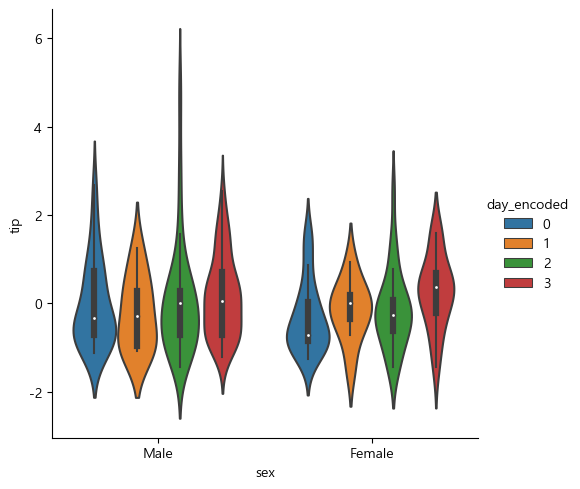

In [25]:
sns.catplot(x = 'sex', y = 'tip', hue = 'day_encoded', data = tips, kind = 'violin')

###### 7. 상관분석

In [26]:
corr_matrix = tips.corr()   
corr_matrix

,total_bill,tip,size,sex_encoded,smoker_encoded,day_encoded,time_encoded
total_bill,1.000000,0.675734,0.598315,-0.144877,-0.085721,0.173693,0.183118
tip,0.675734,1.000000,0.489299,-0.088862,-0.005929,0.135499,0.121629
size,0.598315,0.489299,1.000000,-0.086195,0.133178,0.165350,0.103411
sex_encoded,-0.144877,-0.088862,-0.086195,1.000000,0.002816,-0.230791,-0.205231
smoker_encoded,-0.085721,-0.005929,0.133178,0.002816,1.000000,0.032653,-0.054921
day_encoded,0.173693,0.135499,0.165350,-0.230791,0.032653,1.000000,0.874366
time_encoded,0.183118,0.121629,0.103411,-0.205231,-0.054921,0.874366,1.000000


###### 8. 히트맵

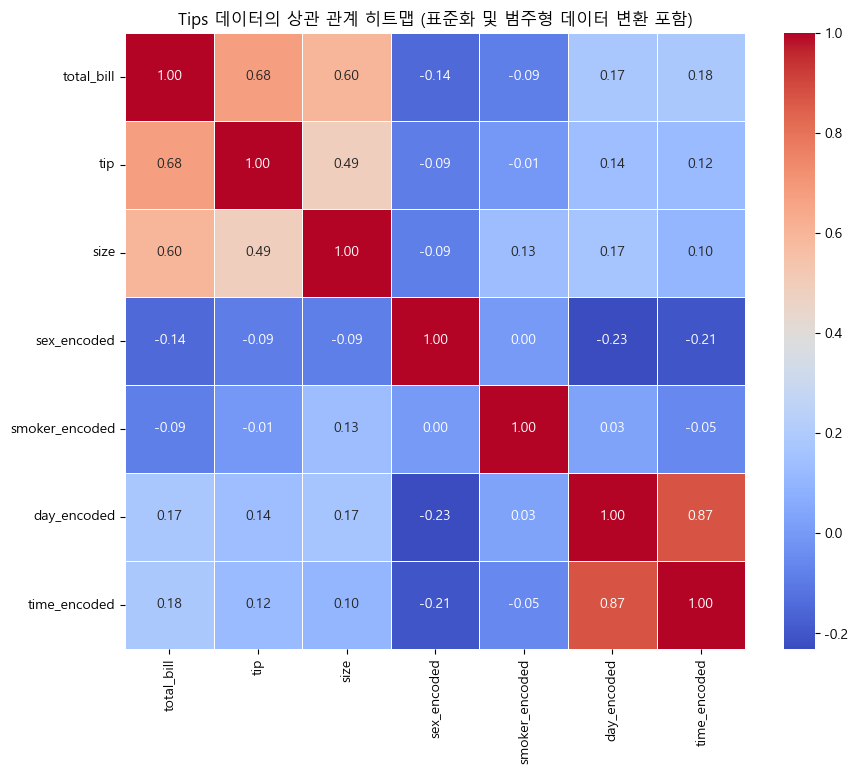

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Tips 데이터의 상관 관계 히트맵 (표준화 및 범주형 데이터 변환 포함)')
plt.show()